IMPORTACIÓN DE LIBRERÍAS NECESARIAS

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# SPOTIFY: PREDICCIONES Y TENDENCIAS MUSICALES

## ABSTRACTO

### La música en formato digital ha adquirido en los últimos años un crecimiento exponencial en su distribución y está impulsada cada vez más por mecanismos automatizados que capturan, clasifican y analizan continuamente grandes cantidades de datos. En este trabajo se buscará gestionar esos datos desde un punto de vista estadístico, y así sugerir herramientas de este tipo para el análisis de los datos.
### Se presta especial atención a variables como la popularidad de las canciones y al índice de “bailabilidad” de las mismas, con el objetivo de poder estimar ciertos patrones de concordancia y tendencias de las nuevas canciones con respecto a las clásicas.


## INTRODUCCIÓN

### La música juega un papel importante en la vida cotidiana de las personas, y con la digitalización se forman grandes colecciones de datos musicales, que tienden a ser acumuladas aún más por los amantes de la música.
### Las estrategias de minería de datos suelen basarse en dos problemas principales: el tipo de datos disponibles y el uso que se quiere hacer de ellos. ¿Qué tipo de datos es la música? Una colección de pistas de música consta de varios tipos de datos; por ejemplo, los datos pueden consistir en archivos de audio de música o metadatos como el título de la pista y el nombre del artista. ¿Qué tipo de análisis se puede realizar? La minería de datos musicales proporciona métodos específicos para responder a las preguntas más variadas: por ejemplo, clasificación de género, identificación de artistas/cantantes, detección de estado de ánimo/emociones, reconocimiento de instrumentos, búsqueda de similitudes musicales, síntesis musical, etc.
### Este trabajo busca analizar la relación entre las características de audio de los datos de canciones obtenidos de la base de datos de Spotify y la popularidad de la canción, medida por la cantidad de reproducciones que tiene una canción en Spotify. Investigaciones anteriores sobre el tema de la predicción del éxito de nuevos productos han identificado múltiples enfoques para responder a esta pregunta. Además, el cuerpo de investigación existente que define muchos modelos de predicción de popularidad enfatiza la complejidad de los mecanismos de popularidad de las canciones.
### Se buscará predecir si ciertas características de audio como el volumen, la duración y la simplicidad armónica se correlacionan con la evolución de las tendencias musicales.

## PREGUNTAS E HIPÓTESIS
### Algunas de las preguntas que se busca clarificar con la confección del siguiente trabajo son:
- ¿Qué tipo de estilos musicales suelen aparecer en Spotify? 
- ¿Las listas de canciones más populares siguen algún tipo de tendencia?
- ¿Es una tendencia que las canciones sean cada vez más “bailables”?
- ¿La música que se presenta a menudo es más acústica o tendiente a ser más “chill”?
- ¿Cuáles son los tipos de música que podríamos disfrutar?


## SOBRE EL DATASET

### CONTEXTO ANALITICO
#### El Dataset con el que se trabajará a continuación corresponde a un conjunto de datos referidos a canciones encontradas en la plataforma de música digital Spotify, las cuales poseen una gran variedad de géneros musicales.
#### El archivo .csv utilizado fue descargado de la página kaggle.com.


### CONTEXTO COMERCIAL
#### El objetivo del presente trabajo es analizar la relación entre las características de audio de canciones obtenidos de la base de datos de Spotify y la popularidad de la canción, medida por la cantidad de reproducciones que tiene una canción en Spotify. También poder determinar si existe cierta tendencia en los últimos años en dar mayor popularidad y éxito a determinados géneros musicales.


### DESCRIPCIÓN DEL DATASET:

- track_id: El ID de Spotify para la canción
- artists: Los nombres de los artistas que interpretaron la canción. Si hay más de un artista, se separan con un ;
- album_name: El nombre del álbum en el que aparece la canción
- track_name: Nombre de la canción
- popularity: La popularidad de una canción es un valor entre 0 y 100, siendo 100 la más popular. La popularidad se calcula mediante un algoritmo y se basa, en su mayor parte, en el número total de reproducciones que ha tenido la canción y cuán recientes son esas reproducciones. En términos generales, las canciones que se tocan y reproducen mucho ahora tendrán una mayor popularidad que las canciones que se tocaban mucho en el pasado. Las canciones duplicadas (por ejemplo, la misma canción de un sencillo y un álbum) se clasifican de forma independiente. La popularidad del artista y del álbum se deriva matemáticamente de la popularidad de la canción.
- duration_ms: la duración de la canción en milisegundos
- explicit: si la canción tiene letras explícitas o no (verdadero = sí, falso = no, no O desconocido)
- danceability: la “bailabilidad” describe qué tan adecuada es una canción para bailar en función de una combinación de elementos musicales que incluyen tempo, estabilidad del ritmo, fuerza del ritmo y regularidad general. Un valor de 0,0 es menos bailable y 1,0 es más bailable
- energy: La energía es una medida de 0,0 a 1,0 y representa una medida perceptible de intensidad y actividad. Por lo general, las canciones enérgicas se sienten rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach puntúa bajo en la escala.
- key: La clave en la que se encuentra la canción. Los números enteros se asignan a tonos utilizando la notación estándar de clase de tono. P.ej. 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detectó ninguna clave, el valor es -1
- loudness: el volumen general de una canción en decibeles (dB)
- mode: indica la modalidad (mayor o menor) de una canción, el tipo de escala de la que se deriva su contenido melódico. Mayor está representado por 1 y menor es 0
- speechiness: detecta la presencia de palabras habladas en una canción. Cuanto más parecida a la voz sea la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cerca de 1,0 será el valor del atributo. Los valores superiores a 0,66 describen canciones que probablemente estén formadas en su totalidad por palabras habladas. Los valores entre 0,33 y 0,66 describen canciones que pueden contener tanto música como voz, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores por debajo de 0,33 probablemente representen música y otras canciones que no sean de voz.
- acousticness: una medida de confianza de 0,0 a 1,0 de si la canción es acústica. 1.0 representa una alta confianza en que la canción es acústica
- instrumentalness: predice si una canción no contiene voces. Los sonidos "Ooh" y "aah" se tratan como instrumentales en este contexto. Las canciones de rap o de palabras habladas son claramente "vocales". Cuanto más cerca esté el valor de instrumentalidad de 1,0, mayor será la probabilidad de que la canción no contenga contenido vocal.
- liveness: Detecta la presencia de una audiencia en la grabación. Los valores de vivacidad más altos representan una mayor probabilidad de que la canción se interprete en vivo. Un valor por encima de 0,8 proporciona una gran probabilidad de que la canción esté en vivo
- valence: Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una canción. Las canciones con una valencia alta suenan más positivas (p. ej., felices, alegres, eufóricas), mientras que las canciones con una valencia baja suenan más negativas (p. ej., tristes, deprimidas, enojadas).
- tempo: el tempo general estimado de una canción en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o ritmo de una pieza dada y se deriva directamente de la duración promedio del tiempo.
- time_signature: una firma de tiempo estimada. El compás (medidor) es una convención de notación para especificar cuántos tiempos hay en cada compás (o compás). El compás varía de 3 a 7, lo que indica compases de 3/4 a 7/4.
- track_genre: el género al que pertenece la canción


In [6]:
pd.read_csv('/workspaces/Nuevo-repo/data/raw/spotify.csv')

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [8]:
data = pd.read_csv('/workspaces/Nuevo-repo/data/raw/spotify.csv')
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# EXPLORATORY DATA ANALYSIS (EDA)

#### El Dataset cuenta con 114000 filas y 21 columnas

### Se crea una nueva función llamada "df" en la cual se busca eliminar la columna denominada "Unnamed"

In [16]:
df = data.drop("Unnamed: 0", axis=1) 

In [10]:
df.isna().sum() ## Chequeo de valores nulos

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [11]:
df = df.dropna() ## Eliminación de valores nulos

In [12]:
df.isna().sum() ## Re chequeo de valores nulos

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [13]:
df = df.drop_duplicates() ## Eliminación de valores duplicados

### Información de las variables que componen el Dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           11

In [13]:
df.shape

(113549, 20)

#### El Dataset modificado cuenta con 113549 filas y 20 columnas

### Las columnas que contiene el Dataset son las siguientes:

In [17]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

#### Se reemplaza los valores de la columna "duration_ms" del DataFrame "df" que contienen la cadena "durations_ms" por un valor vacío o nulo.

In [15]:
df["duration_ms"]= df["duration_ms"].replace("durations_ms", )

In [16]:
len(df.columns)

20

# ARTISTAS MÁS POPULARES

### A continuación se van a definir una serie de variables para buscar responder determinadas preguntas con respecto al Dataset seleccionado

#### Se define la variable llamada "popular_artists" la cual busca predecir cuales son aquellos músicos que adquieren mayor preponderancia en la plataforma.

In [18]:
popular_artists = df.groupby("artists").count().sort_values(by='popularity', ascending=False)['popularity'][:5]
popular_artists

artists
The Beatles        279
George Jones       271
Stevie Wonder      236
Linkin Park        224
Ella Fitzgerald    222
Name: popularity, dtype: int64

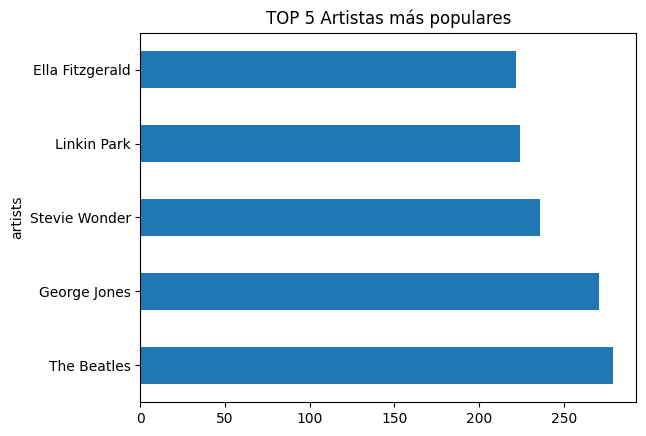

In [21]:
popular_artists.plot.barh() ##visualize the data
plt.title("TOP 5 Artistas más populares")
plt.show()

#### Es así, que luego de la observación del gráfico se puede denotar que la banda originaria de Liverpool es la más popular en la plataforma, seguida por otro artista clásico llamado George Jones.

# CANCIONES CON MAYOR DURACIÓN

#### Se define la variable llamada "long_songs"" la cual busca predecir cuales aquellas composiciones musicales que adquieren mayor duración en cuanto a tiempo. El mismo se expresa en milisegundos.

In [22]:
long_songs = df[["track_name", "duration_ms"]].sort_values(by="duration_ms", ascending=False)[:5]
long_songs

,track_name,duration_ms
73617,Unity (Voyage Mix) Pt. 1,5237295
10984,Crossing Wires 002 - Continuous DJ Mix,4789026
10935,Crossing Wires 002 - Continuous DJ Mix,4789026
24348,The Lab 03 - Continuous DJ Mix Part 1,4730302
73840,Amnesia Ibiza Underground 10 DJ Mix,4563897


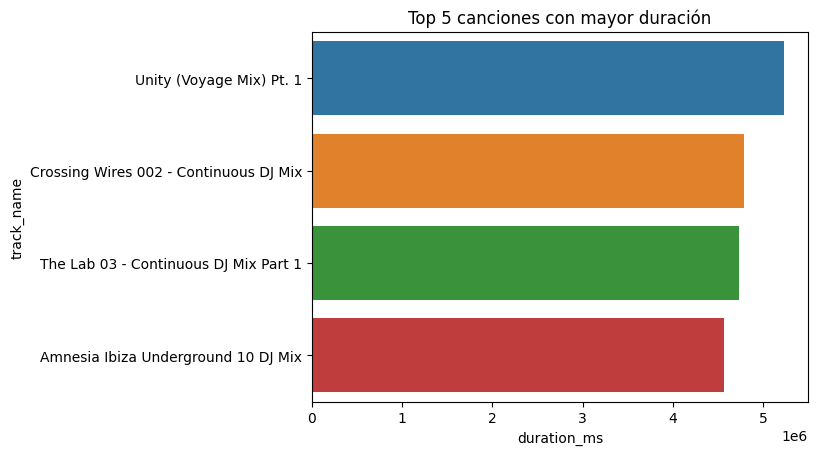

In [23]:
sns.barplot(x="duration_ms", y="track_name", data= long_songs)
plt.title("Top 5 canciones con mayor duración")
plt.show()

#### Se puede determinar que la primera parte de la canción llamada Unity es la que mayor duración posee, alcanzando más de 5mil segundos (más de una hora de duración). Es del género de música electrónica.

# GÉNEROS MUSICALES MÁS POPULARES

#### Se define la variable llamada "trend_genre"" con el objetivo de denotar aquellos géneros que cuentan con mayor popularidad en la plataforma.

In [24]:
trend_genre = df[["track_genre", "popularity"]].sort_values(by="popularity", ascending=False)[:5]
trend_genre

,track_genre,popularity
20001,dance,100
81051,pop,100
51664,hip-hop,99
81210,pop,98
89411,reggaeton,98


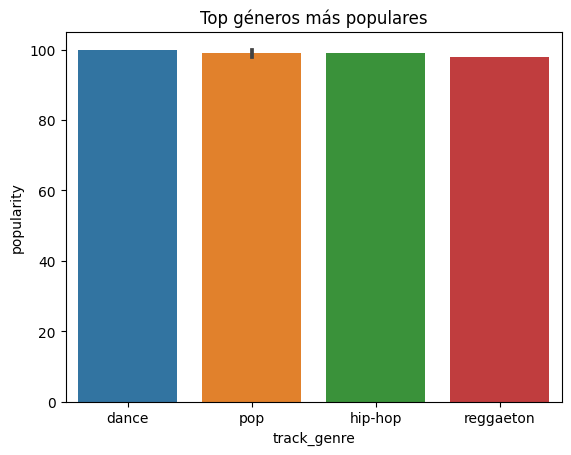

In [25]:
sns.barplot(x="track_genre",y="popularity", data=trend_genre)
plt.title("Top géneros más populares")
plt.show()

#### Es así, que luego del análisis del gráfico de más arriba, se puede concluir que los géneros que adquieren mayor popularidad a lo largo del mundo son aquellos que cuentan con un alto índice de "bailabilidad", variable que se analizará más adelante.

# GÉNEROS MUSICALES MÁS "BAILABLES"

#### En corcondancia con lo expuesto más arriba, se define la variable llamada "danceable"" con el objetivo de mostrar cuáles son las canciones que cuentan con un índice más alto en cuanto a su predisposición para hacer "mover más a los oyentes", guardando alta relación con aquellos géneros que cuentan con mayor popularidad en la plataforma.

In [26]:
danceable = df[["track_name", "artists", "danceability"]].sort_values(by="danceability", ascending=False)[:5]
danceable

,track_name,artists,danceability
111635,Sol Clap,Quantic,0.985
66576,Medicaid Baby,That Girl Lay Lay,0.984
24916,Inspiration,Delano Smith,0.983
73374,Daily Routines,Oliver Schories,0.982
66793,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",Mixx Master Lee,0.981


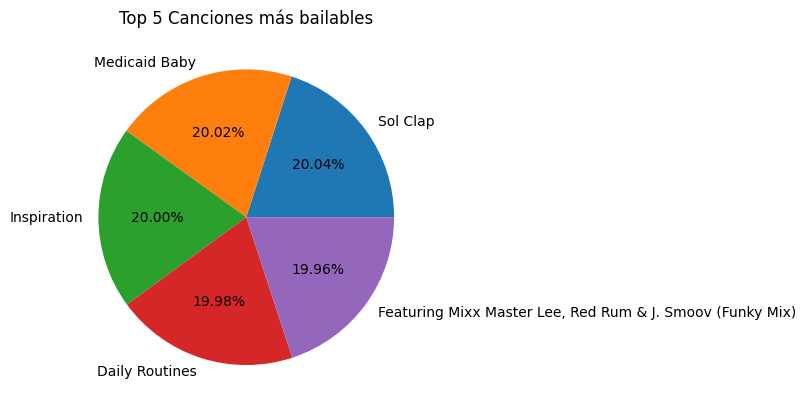

In [27]:
plt.pie(x="danceability", data=danceable, autopct='%1.2f%%', labels=danceable.track_name)
plt.title("Top 5 Canciones más bailables")
plt.show()

#### Del gráfico anterior podemos notar algo que presta estrecha relación con la conclusión anterior y es que las cinco canciones más bailables corresponden al género musical con mayor popularidad en la actualidad.

# CORRELACIÓN ENTRE VARIABLES

In [28]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


### Obtención de la variable para correlación

#### El objetivo es calcular la matriz de correlación de Pearson para el DataFrame llamado "df" y guardar el resultado en una nueva variable llamada "corr_table", y así obtener una medida de la relación lineal entre variables.
#### Esta matriz de correlación muestra cómo están relacionadas las diferentes variables numéricas que componen el DataFrame, lo que puede ser útil para entender las relaciones entre los datos y explorar posibles patrones de correlación.

In [29]:
corr_table = df.corr(method="pearson", numeric_only=True) ## se especifica el argumento "numeric_only=True" para calcular la correlación solo entre las columnas numéricas del DataFrame
corr_table

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007101,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073
duration_ms,-0.007101,1.000000,-0.065263,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225
explicit,0.044082,-0.065263,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816,0.038386
danceability,0.035448,-0.073426,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218
energy,0.001056,0.058523,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126
key,-0.003853,0.008114,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065
loudness,0.050423,-0.003470,0.108588,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992
mode,-0.013931,-0.035556,-0.037212,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092
speechiness,-0.044927,-0.062600,0.307952,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011
acousticness,-0.025472,-0.103788,-0.094403,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138


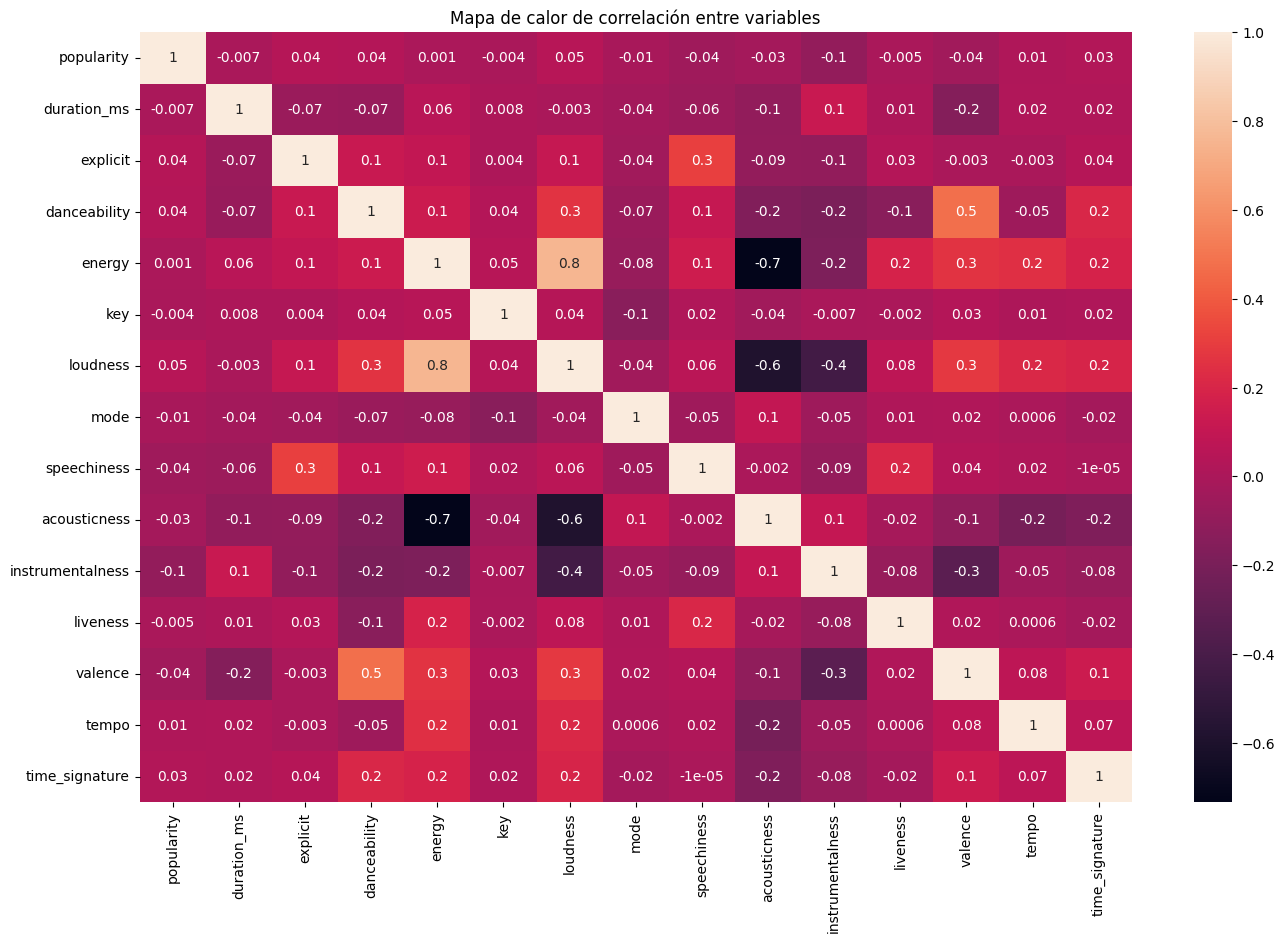

In [32]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_table, annot=True, fmt=".1g")
plt.title("Mapa de calor de correlación entre variables")
plt.show()

#### Luego del análisis del gráfico anterior, se puede establecer que la correlación más alta que existe entre las variables presentes se da entre "loudness" y "energy", alcanzando un valor de 0.8.

In [32]:
sample = df.sample(int(0.01 * len(df)))
len(sample)

1135

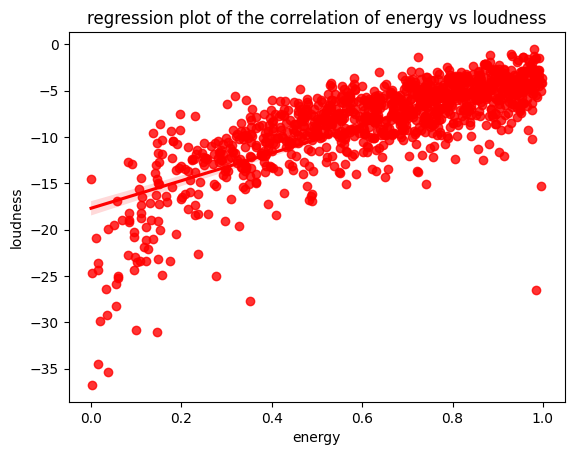

In [34]:
sns.regplot(data=sample, y="loudness", x="energy", color="r")
plt.title("regression plot of the correlation of energy vs loudness")
plt.show()

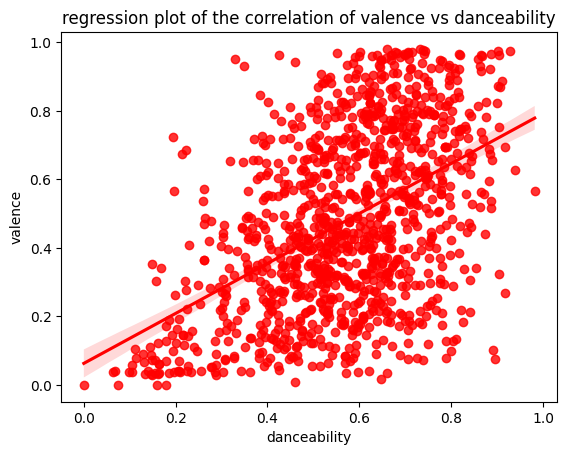

In [36]:
sns.regplot(data=sample, y="valence", x="danceability", color="r")
plt.title("regression plot of the correlation of valence vs danceability")
plt.show()

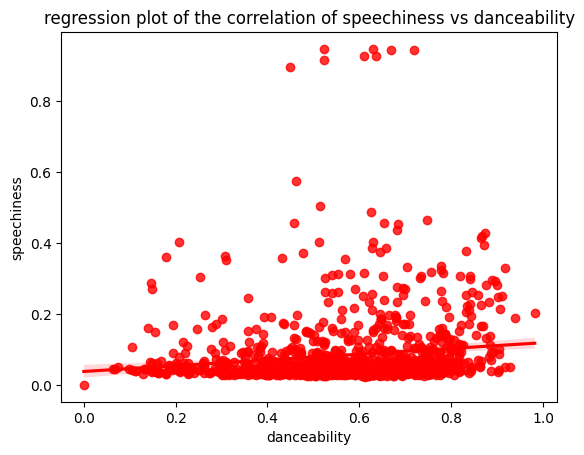

In [38]:
sns.regplot(data=sample, y="speechiness", x="danceability", color="r")
plt.title("regression plot of the correlation of speechiness vs danceability")
plt.show()

In [42]:
spoti = pd.read_csv('/workspaces/Nuevo-repo/data/raw/spotify.csv').head(100)
spoti

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,15BFn2VmEtonsXfNL1lUmy,The Civil Wars,Chill Christmas Dinner,I Heard The Bells On Christmas Day,0,154440,False,0.492,0.1450,...,-14.504,0,0.0422,0.8720,0.000010,0.1070,0.218,90.078,4,acoustic
96,96,0WOFJR54wyTwLB11jcBDb1,The Civil Wars,sadsadchristmas,I Heard The Bells On Christmas Day,0,154440,False,0.492,0.1450,...,-14.504,0,0.0422,0.8720,0.000010,0.1070,0.218,90.078,4,acoustic
97,97,1uDCw6LVMOmbZ6zRliNcNX,The Civil Wars,Christmas Country Songs 2022,I Heard The Bells On Christmas Day,0,154440,False,0.492,0.1450,...,-14.504,0,0.0422,0.8720,0.000010,0.1070,0.218,90.078,4,acoustic
98,98,7DYsBLdOqz0z14tYWMt2Tn,KT Tunstall,Del gusto de mamá,Hold On,0,177613,False,0.661,0.9370,...,-5.157,0,0.0979,0.3220,0.000001,0.1900,0.805,105.549,4,acoustic


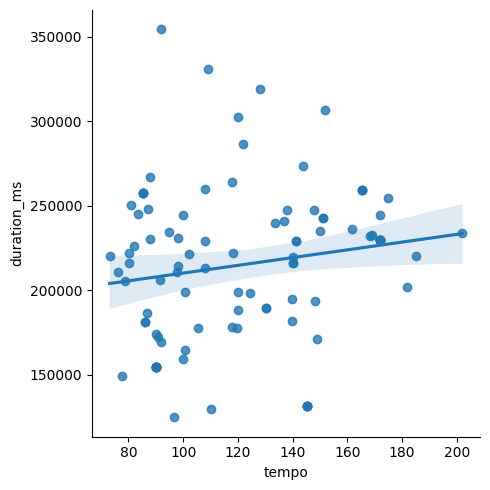

In [43]:
sums_lmplot = sns.lmplot(x="tempo", y="duration_ms", data=spoti)

In my spotify dataset. I wanted to see if the tempo affected how long a song is. As you can see below,there is a slight correlation between a songs tempo and duration.¶

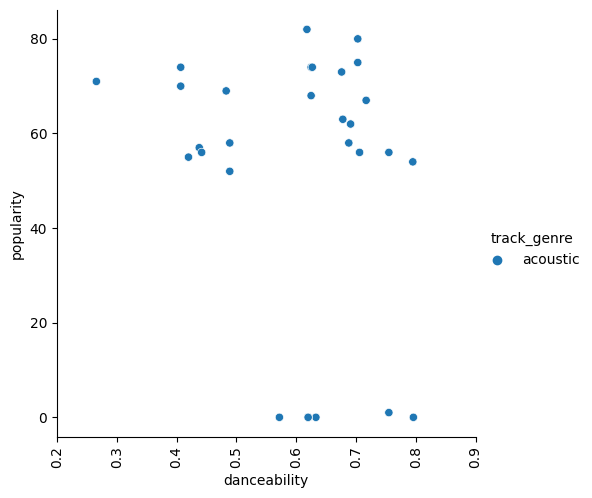

In [49]:
spotify_plot = sns.relplot(x="danceability",y="popularity", data=spoti.head(30), hue="track_genre")
## spotify_plot = sns.relplot(x="energy",y="loudness", data=spoti.head(500), hue="track_genre")
spotify_plot.set_xticklabels(rotation=90)

Next, I wanted see how dance-able songs are compared to there popularity rating. In the plot below, it seems as though the higher the acoustic songs popularity is, the dance-able is around .6.

In [50]:
from matplotlib.pyplot import plot

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
music_data = pd.read_csv('/workspaces/Nuevo-repo/data/raw/spotify.csv')
music_data.dropna(inplace=True)
music_data.drop_duplicates(inplace=True)

In [58]:
X = music_data.drop(columns = ["track_id", "artists", "album_name", "track_name", "track_genre"])
y = music_data["track_genre"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
print(score)

0.9984912280701754
